In [ ]:
import numpy as np
import pandas as pd

In [ ]:
raw_data = pd.read_excel('/content/drive/My Drive/Datasets/Worksheet in Analytics_Case_Resolvr2020.xlsx', sheet_name = 2)
data = raw_data.copy()
data.head()


,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129876 non-null  float64
 8   Departure/Arrival time convenient  129876 non-null  float64
 9   Ease of Online booking             129877 non-null  float64
 10  Gate location                      129872 non-null  float64
 11  Food and drink                     1298

In [ ]:
#missing values
missing_values_count = data.isnull().sum()
missing_values_count

Customer ID                            0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  4
Departure/Arrival time convenient      4
Ease of Online booking                 3
Gate location                          8
Food and drink                         5
Online boarding                        6
Seat comfort                           1
Inflight entertainment                 4
On-board service                       3
Leg room service                       2
Baggage handling                       2
Checkin service                        3
Inflight service                       1
Cleanliness                            2
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
# percentage of missing values
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
percent_missing

0.01414767477671697

The total percent of missing values is only 0.014148 %. So, we can either delete these rows or just simply impute NA values with the statistics.

In [ ]:
#imputing missing values in rating columns using mode since they are discrete values
missing_values = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
print(len(missing_values))
for rating in  missing_values:
  data[rating] = data[rating].fillna(data[rating].mode()[0])


14


In [ ]:
#imputing missing values in Arrival delay column since it has floating points
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())


In [ ]:
#rechecking missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
print('%age missing values:' , percent_missing)

Customer ID                          0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
%age missing values: 0.0


In [ ]:
data.duplicated().any()

False

In [ ]:
data.describe()

,Customer ID,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.00000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,2.72868,3.057638,2.756891,2.976933,3.204835,3.252633,3.441354,3.358100,3.383030,3.350901,3.632137,3.306267,3.642216,3.286326,14.713713,15.091129,0.434463
std,37493.270818,15.119360,997.452477,1.32932,1.526743,1.401726,1.278487,1.329900,1.350696,1.319283,1.334017,1.287094,1.316237,1.180015,1.266179,1.176647,1.313682,38.071126,38.407410,0.495688
min,1.000000,7.000000,31.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
data.shape

(129880, 24)

In [ ]:
data.describe(include = np.object)

,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,65899,106100,89693,62160


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


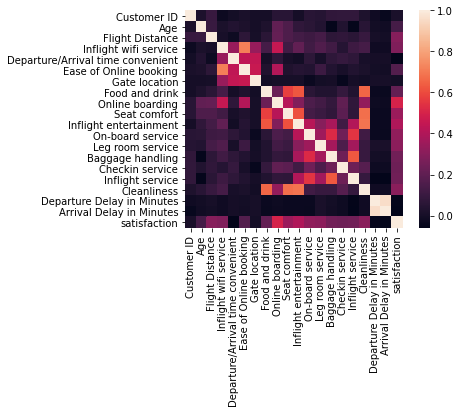

In [ ]:
sns.heatmap(data.corr(), square =True )
plt.show()

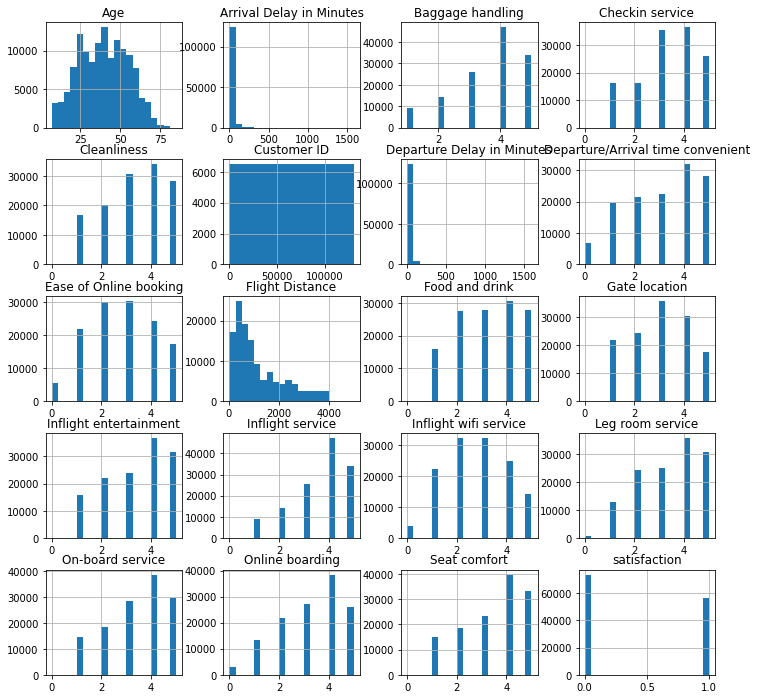

In [ ]:
histogram = data.hist(figsize=(12, 12), bins = 20)

In [ ]:
#metadata
metadata = pd.read_excel('/content/drive/My Drive/Datasets/Worksheet in Analytics_Case_Resolvr2020.xlsx', sheet_name = 1)
metadata

,Unnamed: 0,Data Dictionary,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variable,Description
2,NaN,Customer ID,Id of the customer
3,NaN,Gender,"Gender of the passengers (Female, Male)"
4,NaN,Customer Type,"The customer type (Loyal customer, disloyal c..."
5,NaN,Age,The actual age of the passengers
6,NaN,Type of Travel,Purpose of the flight of the passengers (Pers...
7,NaN,Class,Travel class in the plane of the passengers (...
8,NaN,Flight distance,The flight distance of this journey
9,NaN,Inflight Wi-Fi service,Satisfaction level of the inflight wifi servi...


In [ ]:
#base modeling
from sklearn import preprocessing, metrics
from sklearn.metrics import plot_confusion_matrix
import lightgbm as lgb

In [ ]:
#data splitting and model functions
def get_data_splits(dataframe, valid_fraction = 0.1):
  valid_rows = int(len(dataframe) * valid_fraction)
  train = dataframe[: -valid_rows * 2]
  valid = dataframe[-valid_rows * 2 : -valid_rows]
  test = dataframe[- valid_rows : ]

  return train, valid, test

def train_model(train, valid, test = None, feature_cols = None):
  if feature_cols is None:
    feature_cols = train.columns.drop(['satisfaction'])

  dtrain = lgb.Dataset(train[feature_cols], label = train['satisfaction'])
  dvalid = lgb.Dataset(valid[feature_cols], label = valid['satisfaction'])

  param = {'num_leaves': 64, 'objective':'binary', 'metric': 'auc', 'seed' : 7}
  num_round = 1000
  bst = lgb.train(param, dtrain, num_round, valid_sets = [dvalid],
                  early_stopping_rounds = 20, verbose_eval = False)
  
  valid_pred = bst.predict(valid[feature_cols])
  valid_score = metrics.roc_auc_score(valid['satisfaction'], valid_pred)
  print(f"Validation AUC score: {valid_score}")

  if test is not None:
    test_pred = bst.predict(test[feature_cols])
    test_score = metrics.roc_auc_score(test['satisfaction'], test_pred)
    return bst, valid_score, test_score

  else:
    return bst, valid_score  


In [ ]:
#creating a data copy to see labelencoding performance
le_data = data.copy()

In [ ]:
le_data.head(5)

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1


**Label Encoding**

In [ ]:
#preprocessing
cat_features = ['Gender',	'Customer Type',	'Type of Travel',	'Class']
encoder = preprocessing.LabelEncoder()

#create new columns in data using LabelEncoder
for feature in cat_features:
  encoded = encoder.fit_transform(le_data[feature])
  le_data[feature + '_labels'] = encoded

le_data.head(5)  

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_labels,Customer Type_labels,Type of Travel_labels,Class_labels
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0,1,0,1,2
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0,1,1,0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1,0,0,0,0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0,0,0,0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1,1,0,0,0


In [ ]:
#feature engineering after LabelEncoding
feature_cols = ['Age', 'Flight Distance',	'Inflight wifi service', 'Departure/Arrival time convenient',	'Ease of Online booking',	'Gate location',	'Food and drink',	'Online boarding',	'Seat comfort',	'Inflight entertainment',	'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',	'Inflight service',	'Cleanliness',	'Departure Delay in Minutes',	'Arrival Delay in Minutes',	'Gender_labels',	'Customer Type_labels',	'Type of Travel_labels',	'Class_labels']
train, valid, test = get_data_splits(le_data)
_ = train_model(train, valid, feature_cols = feature_cols)

Validation AUC score: 0.9957136015700723


In [ ]:
#checking model performance by removing Delay departure in minutes
feature_cols = ['Age', 'Flight Distance',	'Inflight wifi service', 'Departure/Arrival time convenient',	'Ease of Online booking',	'Gate location',	'Food and drink',	'Online boarding',	'Seat comfort',	'Inflight entertainment',	'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',	'Inflight service',	'Cleanliness','Arrival Delay in Minutes',	'Gender_labels',	'Customer Type_labels',	'Type of Travel_labels',	'Class_labels']
train, valid, test = get_data_splits(le_data)
_ = train_model(train, valid, feature_cols = feature_cols)

Validation AUC score: 0.9957108546665132


Removing one delay variable has no significant effect as they are highly correlated!

**Count Encoding**

In [ ]:
pip install category-encoders

In [ ]:
import category_encoders as ce

train, valid, test = get_data_splits(data)


In [ ]:
#Create the count encoder
cat_features = ['Gender',	'Customer Type',	'Type of Travel',	'Class']
count_enc = ce.CountEncoder(cols = cat_features)
#learn encoding from train set
count_enc.fit(train[cat_features])

#applying encodings to the train and validation sets as new column
train_encoded = train.join(count_enc.transform(train[cat_features]).add_suffix('_count'))
valid_encoded = valid.join(count_enc.transform(valid[cat_features]).add_suffix('_count'))
feature_cols = ['Age', 'Flight Distance',	'Inflight wifi service', 'Departure/Arrival time convenient',	'Ease of Online booking',	'Gate location',	'Food and drink',	'Online boarding',	'Seat comfort',	'Inflight entertainment',	'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',	'Inflight service',	'Cleanliness','Arrival Delay in Minutes',	'Gender_count',	'Customer Type_count',	'Type of Travel_count',	'Class_count']
_ = train_model(train_encoded, valid_encoded, feature_cols = feature_cols)

Validation AUC score: 0.9957108546665132


Similar performance compared to LabelEncoder

**Target Encoding**

In [ ]:
#Create the target encoder
cat_features = ['Gender',	'Customer Type',	'Type of Travel',	'Class']
target_enc = ce.TargetEncoder(cols = cat_features)
#learn encoding from train set
target_enc.fit(train[cat_features], train['satisfaction'])

#applying encodings to the train and validation sets as new column
train_encoded = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
valid_encoded = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_target'))
feature_cols = ['Age', 'Flight Distance',	'Inflight wifi service', 'Departure/Arrival time convenient',	'Ease of Online booking',	'Gate location',	'Food and drink',	'Online boarding',	'Seat comfort',	'Inflight entertainment',	'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',	'Inflight service',	'Cleanliness','Arrival Delay in Minutes',	'Gender_target',	'Customer Type_target',	'Type of Travel_target',	'Class_target']
_ = train_model(train_encoded, valid_encoded, feature_cols = feature_cols)

Validation AUC score: 0.9958640788746852


Slight improvement in performance with TargetEncoder

**CatBoost Encoding**

In [ ]:
#Create the target encoder
cat_features = ['Gender',	'Customer Type',	'Type of Travel',	'Class']
cb_enc = ce.CatBoostEncoder(cols = cat_features, random_state = 7)
#learn encoding from train set
cb_enc.fit(train[cat_features], train['satisfaction'])

#applying encodings to the train and validation sets as new column
train_encoded = train.join(cb_enc.transform(train[cat_features]).add_suffix('_cb'))
valid_encoded = valid.join(cb_enc.transform(valid[cat_features]).add_suffix('_cb'))
test_encoded  = test.join(cb_enc.transform(test[cat_features]).add_suffix('_cb'))
feature_cols = ['Age', 'Flight Distance',	'Inflight wifi service', 'Departure/Arrival time convenient',	'Ease of Online booking',	'Gate location',	'Food and drink',	'Online boarding',	'Seat comfort',	'Inflight entertainment',	'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',	'Inflight service',	'Cleanliness','Arrival Delay in Minutes',	'Gender_cb',	'Customer Type_cb',	'Type of Travel_cb',	'Class_cb']
_ = train_model(train_encoded, valid_encoded, feature_cols = feature_cols)

Validation AUC score: 0.9958640788746852


**Using XGBoost model**

In [ ]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(random_state = 7)
XGB_model.fit(train_encoded[feature_cols], train['satisfaction'])

#predictions
XGB_pred = XGB_model.predict(valid_encoded[feature_cols])

In [ ]:
#checking model performance
XGB_score = metrics.roc_auc_score(valid_encoded['satisfaction'], XGB_pred)
print(f"Validation AUC score: {XGB_score}")

Validation AUC score: 0.9383996154335019


In [ ]:
#classification report for XGBClassifier
from sklearn.metrics import classification_report
print(classification_report(valid_encoded['satisfaction'], XGB_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9363    0.9610    0.9485      7313
           1     0.9480    0.9158    0.9316      5675

    accuracy                         0.9413     12988
   macro avg     0.9422    0.9384    0.9401     12988
weighted avg     0.9414    0.9413    0.9411     12988



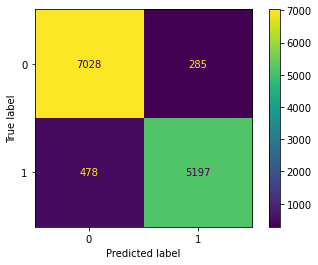

In [ ]:
#confusion matrix
plot_confusion_matrix(XGB_model, valid_encoded[feature_cols], valid_encoded['satisfaction'], values_format = 'd')

**Random Forest Classifier model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomFor_model = RandomForestClassifier(random_state = 7)

RandomFor_model.fit(train_encoded[feature_cols], train['satisfaction'])

#predictions
Random_pred = RandomFor_model.predict(valid_encoded[feature_cols])

In [ ]:
#checking model performance
RF_score = metrics.roc_auc_score(valid_encoded['satisfaction'], Random_pred)
print(f"Validation AUC score: {RF_score}")

Validation AUC score: 0.9614017521148447


In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(valid_encoded['satisfaction'], Random_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9559    0.9811    0.9684      7313
           1     0.9748    0.9417    0.9580      5675

    accuracy                         0.9639     12988
   macro avg     0.9654    0.9614    0.9632     12988
weighted avg     0.9642    0.9639    0.9638     12988



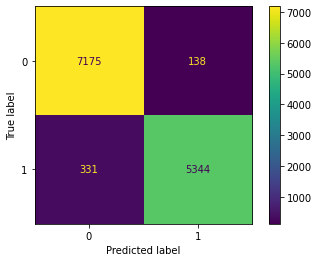

In [ ]:
#confusion matrix
plot_confusion_matrix(RandomFor_model, valid_encoded[feature_cols], valid_encoded['satisfaction'], values_format = 'd')

**ExtraTrees Classifier model**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTrees_model = ExtraTreesClassifier(random_state = 7)
ExtraTrees_model.fit(train_encoded[feature_cols], train['satisfaction'])

#predictions
ExtraTrees_pred = ExtraTrees_model.predict(valid_encoded[feature_cols])

In [ ]:
#checking model performance
ExtraTrees_score = metrics.roc_auc_score(valid_encoded['satisfaction'], ExtraTrees_pred)
print(f"Validation AUC score: {ExtraTrees_score}")

Validation AUC score: 0.9598961839124222


In [ ]:
#classification report for
from sklearn.metrics import classification_report
print(classification_report(valid_encoded['satisfaction'], ExtraTrees_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9549    0.9794    0.9670      7313
           1     0.9725    0.9404    0.9562      5675

    accuracy                         0.9623     12988
   macro avg     0.9637    0.9599    0.9616     12988
weighted avg     0.9626    0.9623    0.9623     12988



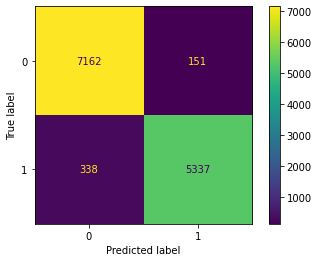

In [ ]:
#confusion matrix
plot_confusion_matrix(ExtraTrees_model, valid_encoded[feature_cols], valid_encoded['satisfaction'], values_format = 'd')

**LightGBM model**

In [ ]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier(random_state = 7,n_estimators=5000,n_jobs=-1)
LGBM_model.fit(train_encoded[feature_cols], train['satisfaction'])

#predictions
LGBM_pred = LGBM_model.predict(valid_encoded[feature_cols])

In [ ]:
#checking model validation performance
LGBM_score = metrics.roc_auc_score(valid_encoded['satisfaction'], LGBM_pred)
print(f"Validation AUC score: {LGBM_score}")

Validation AUC score: 0.9622277990254516


In [ ]:
#classification report validation
from sklearn.metrics import classification_report
print(classification_report(valid_encoded['satisfaction'], LGBM_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9594    0.9778    0.9685      7313
           1     0.9707    0.9466    0.9585      5675

    accuracy                         0.9642     12988
   macro avg     0.9650    0.9622    0.9635     12988
weighted avg     0.9643    0.9642    0.9641     12988



In [ ]:
LGBM_train_pred = LGBM_model.predict(train_encoded[feature_cols])

In [ ]:
LGBM_test_pred = LGBM_model.predict(test_encoded[feature_cols])

In [ ]:
#classification report testing
print(classification_report(test_encoded['satisfaction'], LGBM_test_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9568    0.9760    0.9663      7260
           1     0.9688    0.9441    0.9563      5728

    accuracy                         0.9620     12988
   macro avg     0.9628    0.9601    0.9613     12988
weighted avg     0.9621    0.9620    0.9619     12988



In [ ]:
#checking model training performance
LGBM_train_score = metrics.roc_auc_score(train_encoded['satisfaction'], LGBM_train_pred)
print(f"Training AUC score: {LGBM_train_score}")

Training AUC score: 1.0


In [ ]:
#classification report for training
print(classification_report(train_encoded['satisfaction'], LGBM_train_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     58879
           1     1.0000    1.0000    1.0000     45025

    accuracy                         1.0000    103904
   macro avg     1.0000    1.0000    1.0000    103904
weighted avg     1.0000    1.0000    1.0000    103904



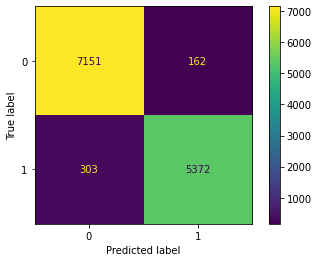

In [ ]:
#confusion matrix for validation
plot_confusion_matrix(LGBM_model, valid_encoded[feature_cols], valid_encoded['satisfaction'], values_format = 'd')

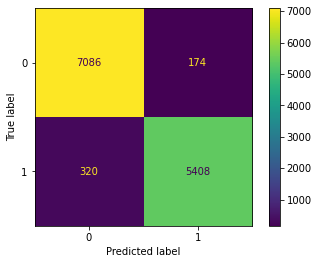

In [ ]:
#confusion matrix test
plot_confusion_matrix(LGBM_model, test_encoded[feature_cols], test_encoded['satisfaction'], values_format = 'd')

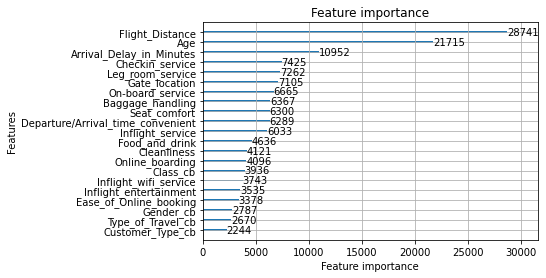

In [ ]:
#plotting feature importance
import lightgbm
lightgbm.plot_importance(LGBM_model, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='Feature importance', ylabel='Features', importance_type='split')

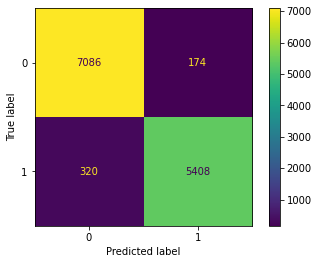

In [ ]:
#confusion matrix for test
plot_confusion_matrix(LGBM_model, test_encoded[feature_cols], test_encoded['satisfaction'], values_format = 'd')

**Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression(random_state = 7)

Logistic_model.fit(train_encoded[feature_cols], train['satisfaction'])
Logistic_pred = Logistic_model.predict(valid_encoded[feature_cols])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#checking model performance
Logistic_score = metrics.roc_auc_score(valid_encoded['satisfaction'], Logistic_pred)
print(f"Validation AUC score: {Logistic_score}")

Validation AUC score: 0.7590164037128979
